# 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


# 2. Load data

In [8]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\Lan default prediction\loan_data_set.csv")
df = pd.read_csv(file_path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [15]:
df.info()

# this provide basic dypes, we can remove/drop certain features like "load_id" which is bussiness key
# there are ordinal feature (education, Property_Area)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
df.describe()

# loanamt, load_amt_term, credit_history have missing values need to check

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
df.isnull().sum()

# features with null values are treated with imputation technqiue's like (mean, mode, median)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df.duplicated().sum()

# No duplicated value in df

0

In [29]:
df.columns = df.columns.str.lower()
df.columns
# convert all column_names to lowercase

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

# 3. Exploratary Data Analysis (EDA)

In [33]:
df_loan = df.copy(deep=True)

# copy original dataset, usefull for future reference
# going forward we will be using "df_loan" 

In [34]:
df_loan.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [35]:
df_loan.drop('loan_id', axis = 1, inplace = True)

# drop/remove unneccessary columns in df

In [36]:
df_loan.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## 3.1 Categorical Analysis

In [39]:
categorical_cols = df_loan.select_dtypes(include = 'object').columns
categorical_cols

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'property_area', 'loan_status'],
      dtype='object')

In [50]:
for i in df_loan[categorical_cols]:
    print(f"{i} : {df_loan[i].nunique()}")

# gives info on distinctcount of categorical_cols

gender : 2
married : 2
dependents : 4
education : 2
self_employed : 2
property_area : 3
loan_status : 2


In [52]:
for i in df_loan[categorical_cols]:
    print(f"{i} : {df_loan[i].unique()}")

# gives info on distinctcount of categorical_cols, we can clearly observe there are NaN values, which needs to be treated

gender : ['Male' 'Female' nan]
married : ['No' 'Yes' nan]
dependents : ['0' '1' '2' '3+' nan]
education : ['Graduate' 'Not Graduate']
self_employed : ['No' 'Yes' nan]
property_area : ['Urban' 'Rural' 'Semiurban']
loan_status : ['Y' 'N']


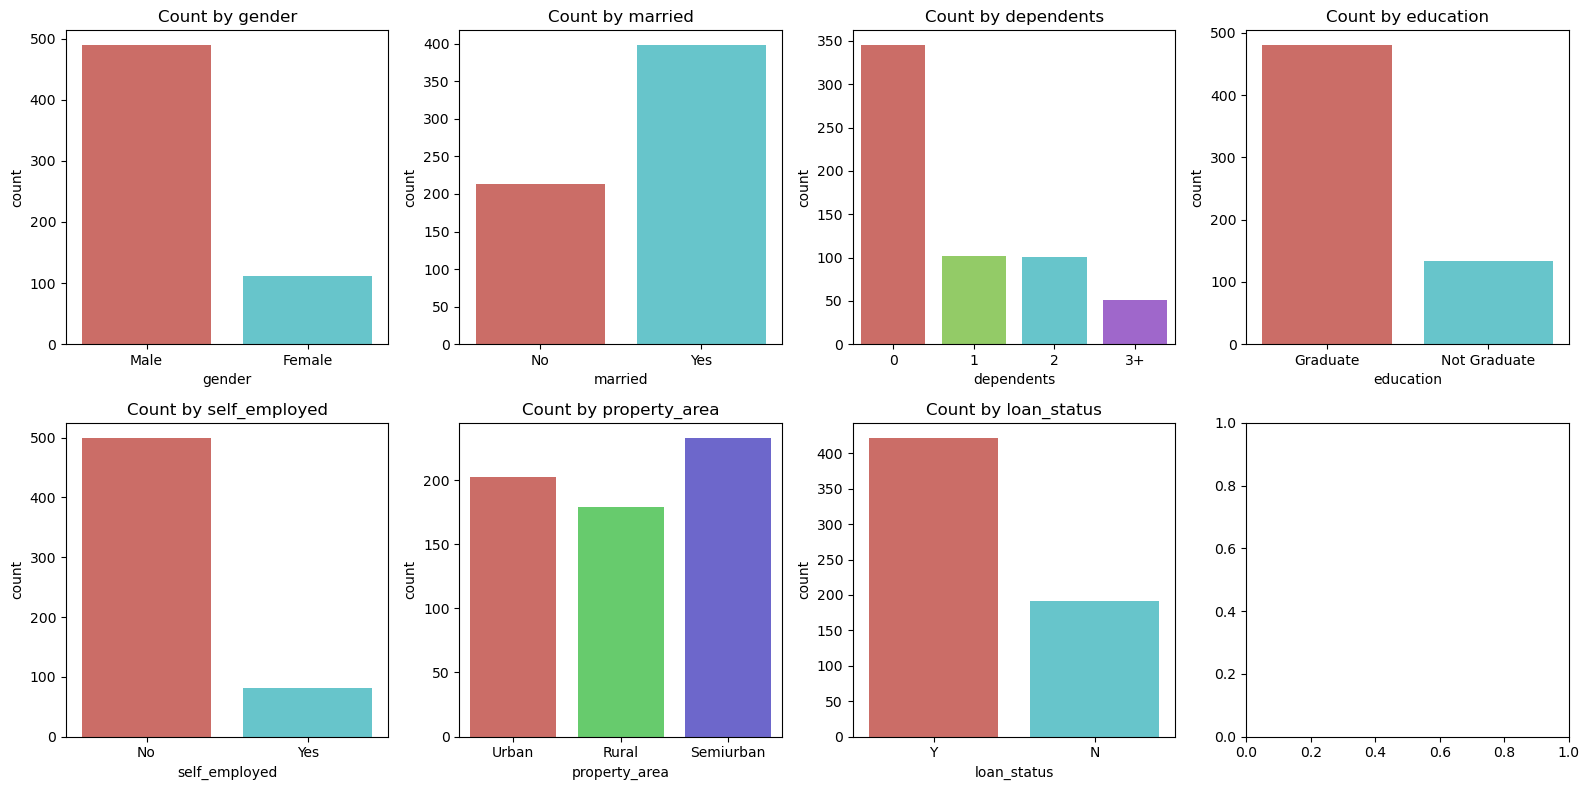

In [69]:
fig, axes = plt.subplots(2, 4, figsize = (16,8))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data = df_loan, x = col, ax = axes[i], palette='hls')
    axes[i].set_title(f"Count by {col}")

plt.tight_layout()
plt.show()

# #_male is 5x times #_not_married
# #_married is 2x times #_not_married
# #_dependents (0) is 3.5x of dependents (1,2,3+)
# graduates are 3x times of Not_graduates
# salaried class id 5x times of self_employed
# semiurban > urban > rural (rural being lowest)


In [104]:
for i in df_loan[categorical_cols]:
    print(f"{i} : {df_loan[i].value_counts()}")
    print(f"{i} : {df_loan[i].isnull().sum()}")
    print("\n")
    
    percentage_values = df_loan[i].value_counts() * 100 / len(df_loan[i])
    print(f"Percentage of {i} values:\n{percentage_values}\n")
    
    percentage_null_values = df_loan[i].isnull().sum() * 100 / len(df_loan[i])
    print(f"Percentage of Null values in {i}:\n{percentage_null_values}\n")
    
    print("*************************************************************")

# gives information of distribution of unique values with count from df
# "self_employed" feature have highest null perc 
# feature with null value perc are in permissble range, so we have directly use imputation technique like mean/median/mode to fill NaN values

gender : gender
Male      489
Female    112
Name: count, dtype: int64
gender : 13


Percentage of gender values:
gender
Male      79.641694
Female    18.241042
Name: count, dtype: float64

Percentage of Null values in gender:
2.1172638436482085

*************************************************************
married : married
Yes    398
No     213
Name: count, dtype: int64
married : 3


Percentage of married values:
married
Yes    64.820847
No     34.690554
Name: count, dtype: float64

Percentage of Null values in married:
0.48859934853420195

*************************************************************
dependents : dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
dependents : 15


Percentage of dependents values:
dependents
0     56.188925
1     16.612378
2     16.449511
3+     8.306189
Name: count, dtype: float64

Percentage of Null values in dependents:
2.44299674267101

*************************************************************
education : education
Gr

## 3.2 Numerical Analysis   

In [118]:
df_loan.columns
numerical_df = df_loan[['applicantincome', 'coapplicantincome','loanamount','loan_amount_term']]
numerical_df

,applicantincome,coapplicantincome,loanamount,loan_amount_term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

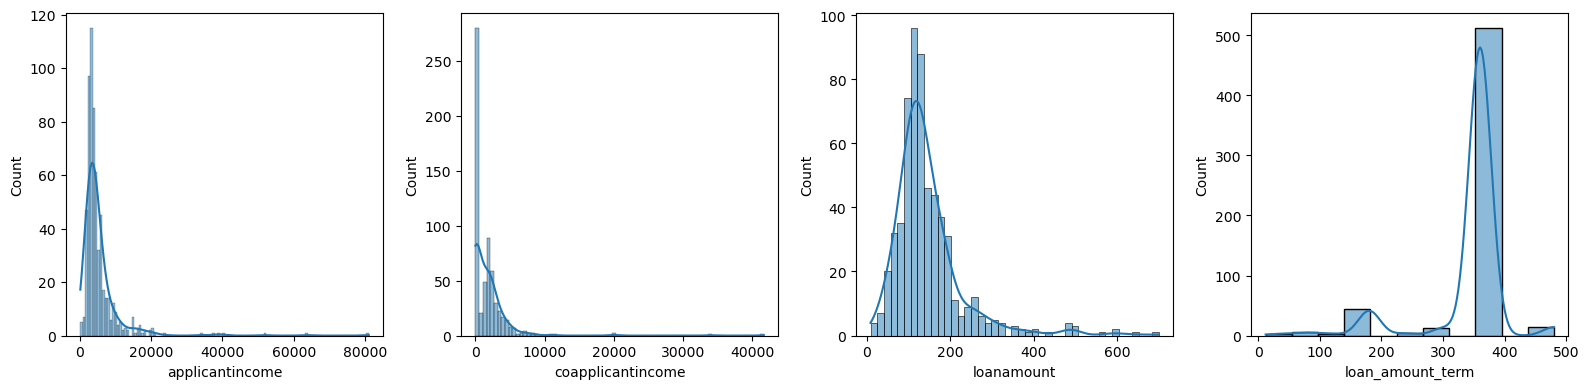

In [119]:
fig, axes = plt.subplots(1,4, figsize = (16,4))
axes = axes.flatten()

for i, col in enumerate(numerical_df):
    sns.histplot(data = df_loan, x = col, kde = True, ax = axes[i])

plt.tight_layout()
plt.show()



# "'ApplicantIncome` distribution is right-skewed, which is expected, as there are fewer individuals with higher incomes."
# "`Co-ApplicantIncome` distribution is right-skewed, which is expected, as there are fewer individuals with higher incomes."
# "`Loanamount` distribution is left-skewed, which is expected, as there are fewer individuals with higher loan intake capacity."
# "`loan_amt_term` distribution is left-skewed, which is expected, as most of individuals excepts to repay loan in longer duration."

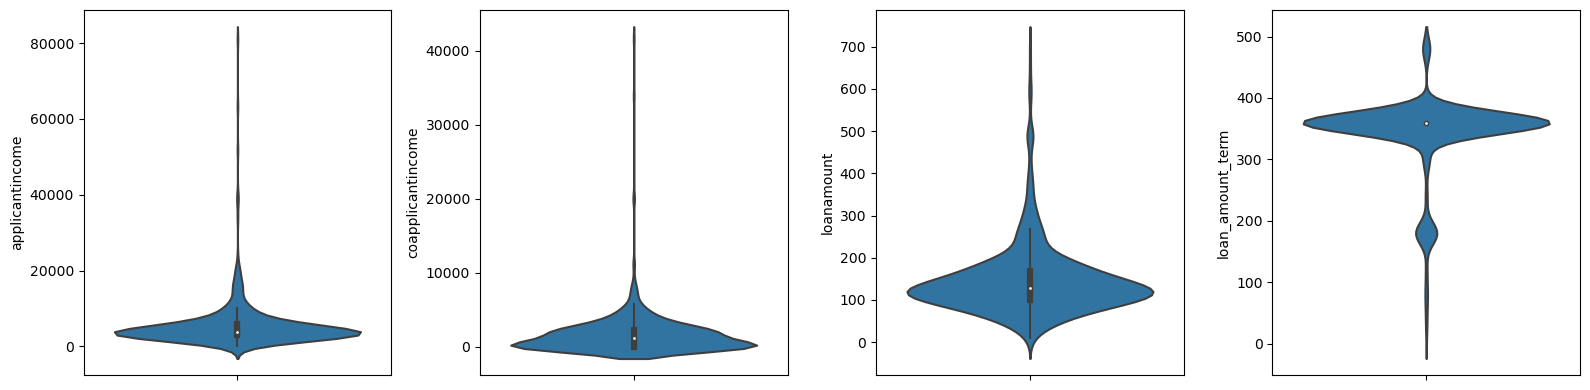

In [120]:
fig, axes = plt.subplots(1,4, figsize = (16,4))
axes = axes.flatten()

for i, col in enumerate(numerical_df):
    sns.violinplot(data = df_loan, y = col, kde = True, ax = axes[i])

plt.tight_layout()
plt.show()

# Need to validat the data again, seems there are few outliers, because few values seems out Range & Measure of central tendency

In [ ]:
correlation_matrix = numerical_df.corr()

plt.figure(figsize = (8,4))
sns.heatmap(data = correlation_matrix, annot= True,  fmt='.2g', cmap='inferno')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# loanamount & applicantincome have positive correlation
# "Values close to 1 indicate a positive correlation, meaning that Feature 1 and Feature 2 increase together or are directly proportional."
# "Values close to -1 indicate a negative correlation, meaning that as Feature 1 increases, Feature 2 decreases, showing an inverse relationship."

## 3.3 Categorical to Categorical Analysis

In [131]:
categorical_cols

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'property_area', 'loan_status'],
      dtype='object')

In [149]:
self_employed_Vs_loanstatus = pd.crosstab(df_loan['self_employed'], df_loan['self_employed'])
self_employed_Vs_loanstatus

self_employed,No,Yes
loan_status,,
N,157,26
Y,343,56


In [133]:
gender_Vs_married = pd.crosstab(df_loan['gender'], df_loan['married'])
gender_Vs_married

married,No,Yes
gender,,
Female,80,31
Male,130,357


In [150]:
property_area_Vs_loanstatus = pd.crosstab(df_loan['property_area'], df_loan['loan_status'])
property_area_Vs_loanstatus

loan_status,N,Y
property_area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


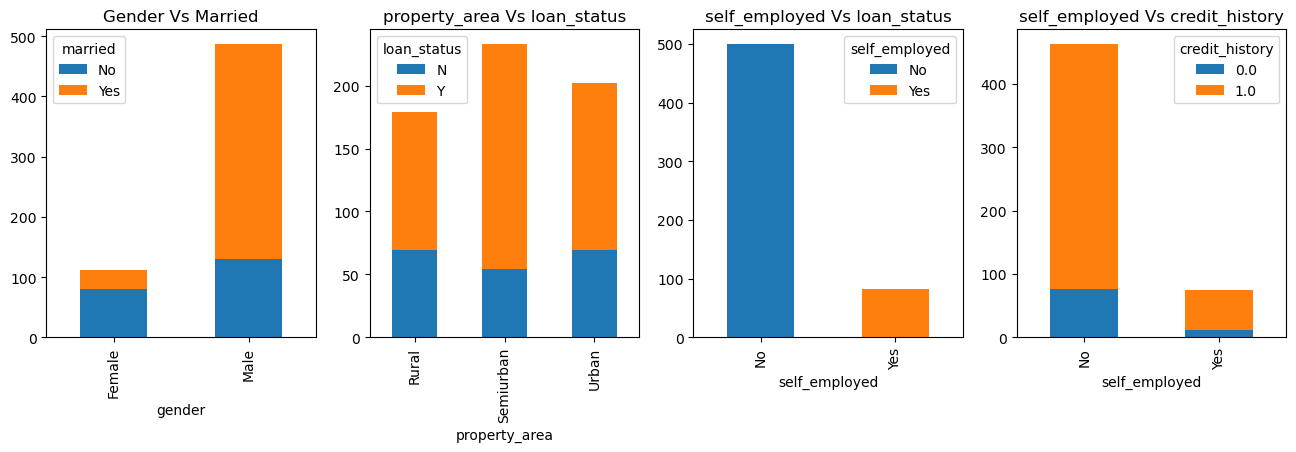

In [164]:
fig, axes = plt.subplots(1,4,figsize = (16,4))

pd.crosstab(df_loan['gender'], df_loan['married']).plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].set_title("Gender Vs Married")

pd.crosstab(df_loan['property_area'], df_loan['loan_status']).plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].set_title("property_area Vs loan_status")

pd.crosstab(df_loan['self_employed'], df_loan['self_employed']).plot(kind = 'bar', stacked = True, ax = axes[2])
axes[2].set_title("self_employed Vs loan_status")

pd.crosstab(df_loan['self_employed'], df_loan['credit_history']).plot(kind = 'bar', stacked = True, ax = axes[3])
axes[3].set_title("self_employed Vs credit_history")


plt.show()

# male_married higher class
# semiurban area has highest approved loan_status
# salary class has highest loan_status
# salary class has good credit_history compared with self_employed

## 3.4 Categorical to Numerical

In [167]:
print(f"categoical_cols: {categorical_cols}"), print(f"numerical_cols: {numerical_df.columns}")

categoical_cols: Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'property_area', 'loan_status'],
      dtype='object')
numerical_cols: Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term'],
      dtype='object')


(None, None)

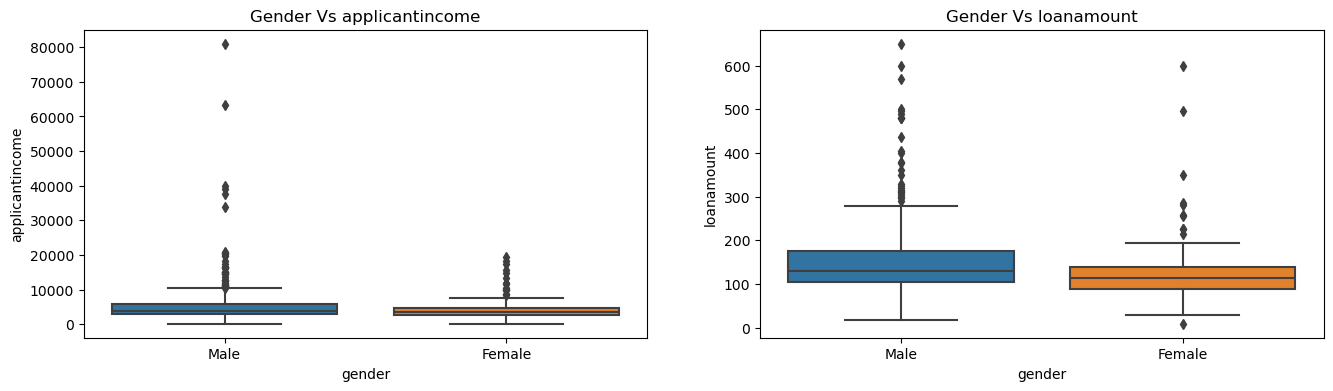

In [181]:
fig, axes = plt.subplots(1,2,figsize = (16,4))

sns.boxplot(data = df_loan, x = 'gender', y ='applicantincome', ax = axes[0])
axes[0].set_title("Gender Vs applicantincome")
sns.boxplot(data = df_loan, x = 'gender', y ='loanamount', ax = axes[1])
axes[1].set_title("Gender Vs loanamount")

plt.show()

# applicant income male > applicant income female
# loan amt of male almost same has loan_amt female (loan_amt doesnt depend of gender)

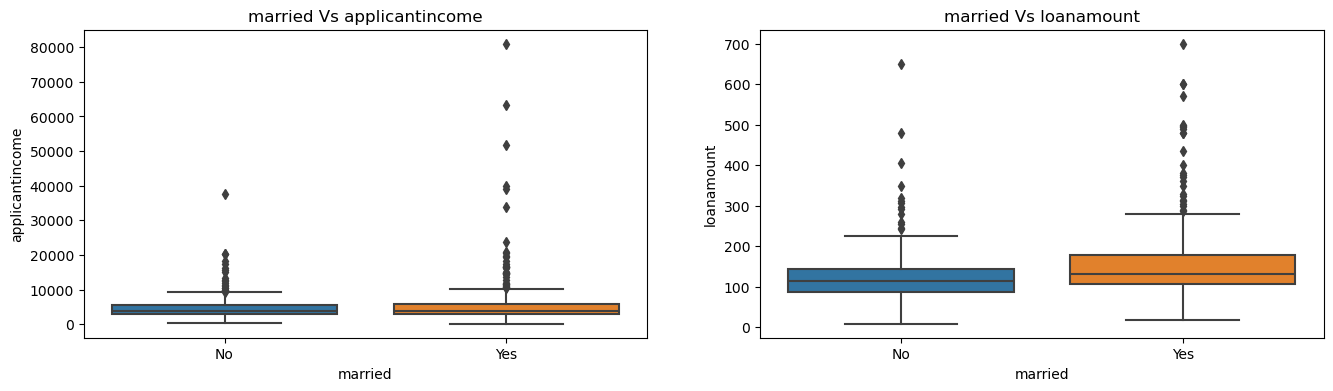

In [183]:
fig, axes = plt.subplots(1,2,figsize = (16,4))

sns.boxplot(data = df_loan, x = 'married', y ='applicantincome', ax = axes[0])
axes[0].set_title("married Vs applicantincome")
sns.boxplot(data = df_loan, x = 'married', y ='loanamount', ax = axes[1])
axes[1].set_title("married Vs loanamount")

plt.show()

# married_class indivuals have higher learning rate compared to Not_married_class
# married taked higher amt loan comapred with Not_married_class

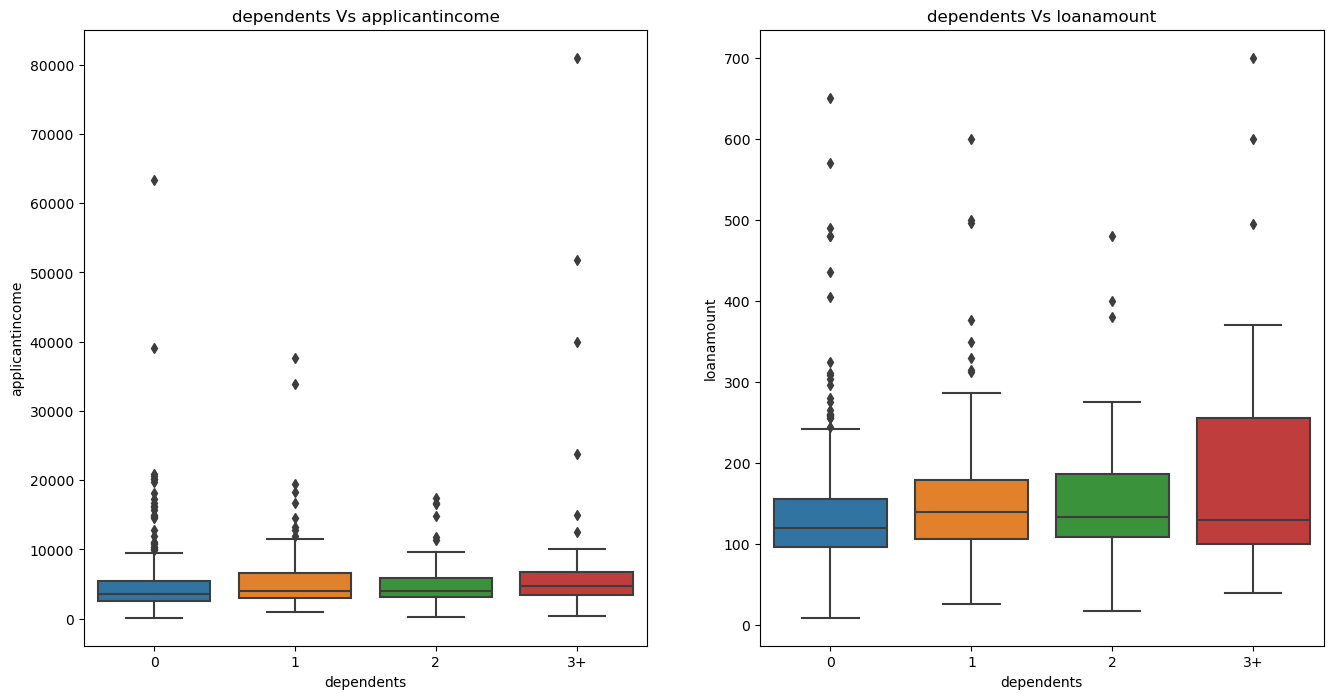

In [186]:
fig, axes = plt.subplots(1,2,figsize = (16,8))

sns.boxplot(data = df_loan, x = 'dependents', y ='applicantincome', ax = axes[0])
axes[0].set_title("dependents Vs applicantincome")
sns.boxplot(data = df_loan, x = 'dependents', y ='loanamount', ax = axes[1])
axes[1].set_title("dependents Vs loanamount")

plt.show()

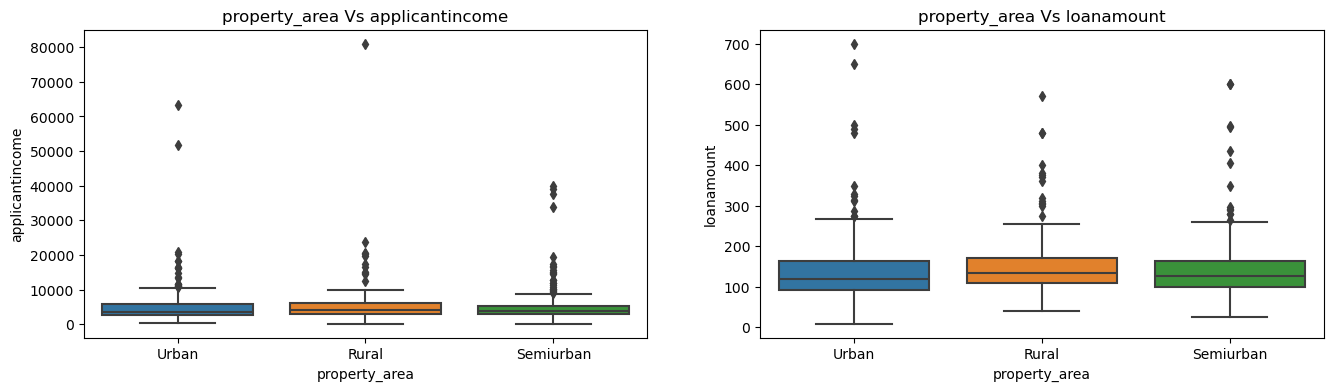

In [188]:
fig, axes = plt.subplots(1,2,figsize = (16,4))

sns.boxplot(data = df_loan, x = 'property_area', y ='applicantincome', ax = axes[0])
axes[0].set_title("property_area Vs applicantincome")
sns.boxplot(data = df_loan, x = 'property_area', y ='loanamount', ax = axes[1])
axes[1].set_title("property_area Vs loanamount")

plt.show()

# income_levl of semi-urban & urban almost in same range
# avg_loan_amt of rural_class is higher than semiurban & urban (rural > semi_urban > urban) 

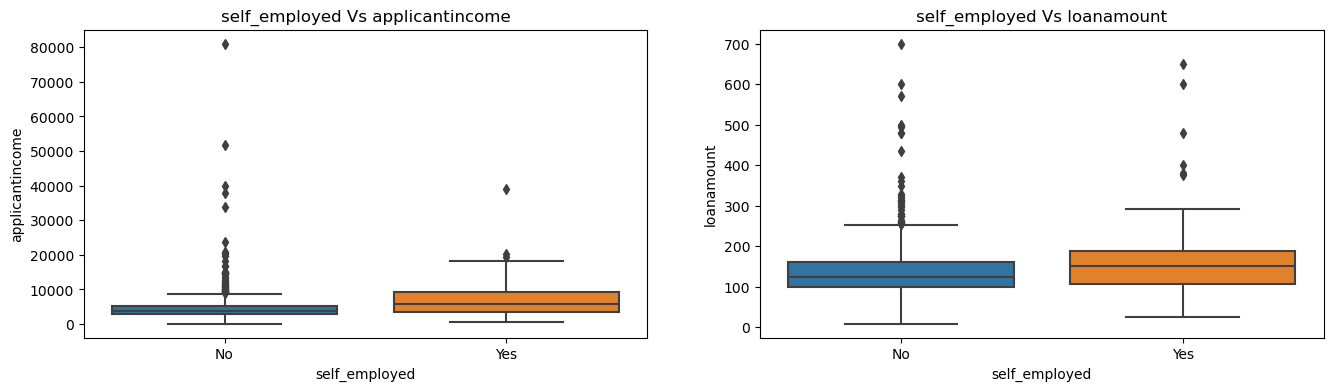

In [191]:
fig, axes = plt.subplots(1,2,figsize = (16,4))

sns.boxplot(data = df_loan, x = 'self_employed', y ='applicantincome', ax = axes[0])
axes[0].set_title("self_employed Vs applicantincome")
sns.boxplot(data = df_loan, x = 'self_employed', y ='loanamount', ax = axes[1])
axes[1].set_title("self_employed Vs loanamount")

plt.show()

# avg self_employed applicant_income higher than Not_self_employed class
# avg self_employed takes higher loan_amt comapred to Not_self_employed class

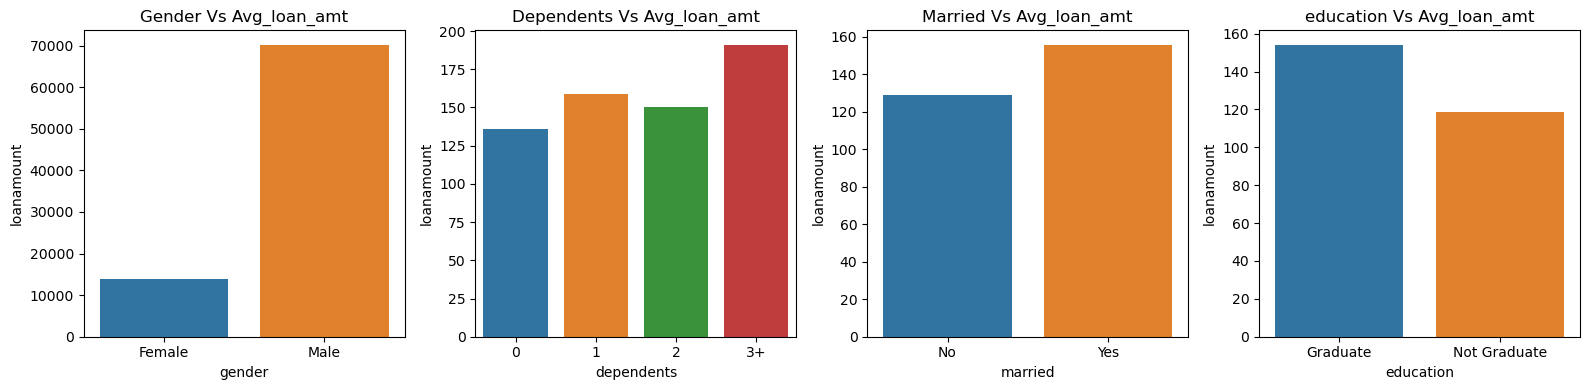

In [244]:
fig, axes = plt.subplots(1,4,figsize = (16,4))
# plt.figure(figsize = (16,8))

axes = axes.flatten()

gender_to_loan_amt = pd.DataFrame(df_loan.groupby(by='gender')['loanamount'].mean()).reset_index()
sns.barplot(x='gender', y='loanamount', data=gender_loan_amt, ax = axes[0])
axes[0].set_title('Gender Vs Avg_loan_amt')

dependents_to_loan_amt = pd.DataFrame(df_loan.groupby(by = 'dependents')['loanamount'].mean()).reset_index()
sns.barplot(x='dependents', y='loanamount', data=dependents_to_loan_amt, ax = axes[1])
axes[1].set_title('Dependents Vs Avg_loan_amt')

married_to_loan_amt = pd.DataFrame(df_loan.groupby(by = 'married')['loanamount'].mean()).reset_index()
sns.barplot(data = married_to_loan_amt, x = 'married', y = 'loanamount', ax = axes[2])
axes[2].set_title('Married Vs Avg_loan_amt')

education_to_loan_amt = pd.DataFrame(df_loan.groupby(by = 'education')['loanamount'].mean()).reset_index()
sns.barplot(data = education_to_loan_amt, x = 'education', y = 'loanamount', ax = axes[3])
axes[3].set_title('education Vs Avg_loan_amt')


plt.tight_layout()
plt.show()


# Avg_loan_amount taken by males > female
# Avg_loan_amount taken by 3+ dependents > compared with others
# Avg_loan_amount taken by married > non-married
# Avg_loan_amount taken by graduates > not graduate

# 4. Data Preprocessing 

## 4.1 Data Imputation

In [253]:
df_loan.shape

(614, 12)

In [259]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            611 non-null    object 
 2   dependents         599 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      582 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         592 non-null    float64
 8   loan_amount_term   600 non-null    float64
 9   credit_history     564 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## 4.1.1 imputation for categorical variables

In [258]:
df_loan['gender'].fillna(df_loan['gender'].mode()[0], inplace = True)

In [269]:
df_loan['married'].fillna(df_loan['married'].mode()[0], inplace=True)
df_loan['dependents'].fillna(df_loan['dependents'].mode()[0], inplace=True)
df_loan['self_employed'].fillna(df_loan['self_employed'].mode()[0], inplace=True)
df_loan['credit_history'].fillna(df_loan['self_employed'].mode()[0], inplace=True)
df_loan['loan_amount_term'].fillna(df_loan['loan_amount_term'].mode()[0], inplace=True)

C:\Users\aravit01\AppData\Local\Temp\ipykernel_23556\1111594445.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_loan['credit_history'].fillna(df_loan['self_employed'].mode()[0], inplace=True)


## 4.1.2 imputation for numerical variables

In [273]:
df_loan['loanamount'].fillna(df_loan['loanamount'].mean(), inplace=True)

In [274]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            614 non-null    object 
 2   dependents         614 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      614 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    object 
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


## 4.2 Outliers treatment using IQR

In [291]:
df_loan.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [292]:
df_loan.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423
std,6109.041673,2926.248369,84.037468,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [307]:
def calculate_IQR(col):
    q1,q3 = col.quantile([0.25,0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return upper_bound, lower_bound 


In [320]:
calculate_IQR(df_loan['applicantincome'])

(5743.125, -3445.875)

In [321]:
df_loan[df_loan['applicantincome'] < calculate_IQR(df_loan['applicantincome'])[1]].shape
df_loan[df_loan['applicantincome'] > calculate_IQR(df_loan['applicantincome'])[0]].shape

# 50 rows of data is greater than upper bound
# 0 rows of data is less than lower bound

(50, 12)

In [322]:
calculate_IQR(df_loan['coapplicantincome'])

(5743.125, -3445.875)

In [324]:
df_loan[df_loan['coapplicantincome'] > calculate_IQR(df_loan['coapplicantincome'])[0]].shape
df_loan[df_loan['coapplicantincome'] < calculate_IQR(df_loan['coapplicantincome'])[1]].shape

# 18 rows of data is greater than upper bound
# 0 rows of data is less than lower bound

(0, 12)

In [336]:
calculate_IQR(df_loan['loanamount'])
calculate_IQR(df_loan['loanamount'])[0]

261.5

In [328]:
df_loan[df_loan['loanamount'] < calculate_IQR(df_loan['loanamount'])[1]].shape
df_loan[df_loan['loanamount'] > calculate_IQR(df_loan['loanamount'])[0]].shape

# 41 rows of data is greater than upper bound
# 0 rows of data is less than lower bound

(41, 12)

In [330]:
outlier_threshold = df_loan[df_loan['loanamount'] > calculate_IQR(df_loan['loanamount'])[0]].shape
outlier_threshold

# loan_amt > 261.5 is considered as outlier removed from existing df

(41, 12)

In [345]:
df_loan_new = df_loan[df_loan['loanamount'] < calculate_IQR(df_loan['loanamount'])[0]]

In [347]:
df_loan_new.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term
count,573.000000,573.000000,573.000000,573.000000
mean,4649.900524,1478.729354,129.190345,342.408377
std,3648.848734,2348.664738,46.504892,64.856437
min,150.000000,0.000000,9.000000,12.000000
25%,2769.000000,0.000000,100.000000,360.000000
50%,3691.000000,1210.000000,125.000000,360.000000
75%,5250.000000,2223.000000,155.000000,360.000000
max,39147.000000,33837.000000,260.000000,480.000000


In [346]:
df_loan_new.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [351]:
df_loan_new.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [372]:
cols_to_encode = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area', 'loan_status']

for i in cols_to_encode:
    print(f"{i} : {df_loan_new[i].unique()}")

gender : ['Male' 'Female']
married : ['No' 'Yes']
dependents : ['0' '1' '3+' '2']
education : ['Graduate' 'Not Graduate']
self_employed : ['No' 'Yes']
credit_history : ['1' '0']
property_area : ['Urban' 'Rural' 'Semiurban']
loan_status : ['Y' 'N']


## 4.3 Lable Encoding for Ordinal features

In [378]:
df_loan_new['dependents'] = df_loan_new['dependents'].map({
    '0': 1,
    '1': 2,
    '2': 3,
    '3+': 4})

C:\Users\aravit01\AppData\Local\Temp\ipykernel_23556\1547376661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_new['dependents'] = df_loan_new['dependents'].map({


In [383]:
df_loan_new['property_area'] = df_loan_new['property_area'].map({
    'Rural': 1,
    'Semiurban': 2,
    'Urban': 3})

C:\Users\aravit01\AppData\Local\Temp\ipykernel_23556\1074348104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_new['property_area'] = df_loan_new['property_area'].map({


In [384]:
cols_to_encode = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area', 'loan_status']

for i in cols_to_encode:
    print(f"{i} : {df_loan_new[i].unique()}")

gender : ['Male' 'Female']
married : ['No' 'Yes']
dependents : [1 2 4 3]
education : ['Graduate' 'Not Graduate']
self_employed : ['No' 'Yes']
credit_history : ['1' '0']
property_area : [3 1 2]
loan_status : ['Y' 'N']


## 4.4 One Hot Encoding for Nominal features